# EEG-Stimuli (Phoneme Experiments)

## Load Dataset

In [1]:
from lib import *
dataset = BrennanDataset(
    root_dir="./dataset/",
    phoneme_dir="./phonemes/",
    idx="S13") # ,
    # max_items=350)

## Phoneme Analysis

### Load Phoneme Dictionary

In [2]:
phoneme_dict = dataset.phoneme_dict
",".join(phoneme_dict)

'sil,s,ih,sh,ay,iy,hh,zh,th,g,y,m,ae,ah,t,ey,f,oy,eh,aa,p,dh,n,uw,v,ng,z,er,uh,ao,ow,k,ch,aw,jh,r,l,d,w,b'

### Count Phonemes Across the Same Word

In [13]:
word_idxs = dataset.get_label_idxs("beginning")[0:]

In [14]:
from tqdm import tqdm
phone_counts = [0 for i in range(len(phoneme_dict))]
for i in tqdm(range(len(word_idxs))):
    seg = dataset[word_idxs[i]]
    phones = seg["phonemes"]
    for phone in phones:
        phone_counts[phone] += 1

100%|██████████| 1/1 [00:00<00:00, 47.62it/s]


### Plot Bar Chart of Phonemes

In [15]:
import numpy as np
phone_label = phoneme_dict
rows = np.array(list(zip(phone_label, phone_counts)))
phone_df = pd.DataFrame(rows, columns=["phone_label", "phone_count"])
phone_df["phone_count"] = pd.to_numeric(phone_df["phone_count"])
phone_df

,phone_label,phone_count
0,sil,24
1,s,3
2,ih,24
3,sh,0
4,ay,0
5,iy,0
6,hh,0
7,zh,0
8,th,0
9,g,18


<BarContainer object of 40 artists>

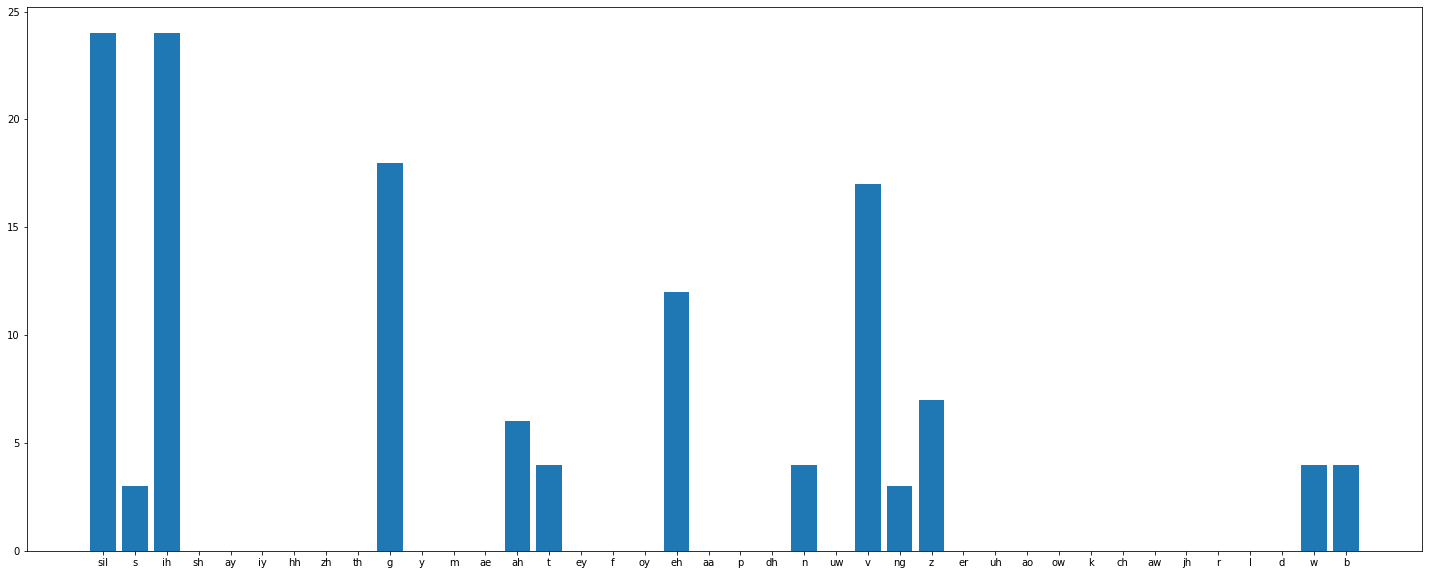

In [16]:
plt.rcParams["figure.figsize"] = (25,10)
plt.bar(phone_df["phone_label"].tolist(), phone_df["phone_count"].tolist())

### Count Phonemes Across Segments

In [22]:
from tqdm import tqdm
phone_counts = [0 for i in range(len(phoneme_dict))]
# for i in tqdm(range(0, 20)):
for i in tqdm(range(len(dataset))):
    seg = dataset[i]
    phones = seg["phonemes"]
    for phone in phones:
        phone_counts[phone] += 1

100%|██████████| 2129/2129 [00:42<00:00, 49.62it/s]


### Plot Bar Chart of Phonemes

In [23]:
import numpy as np
phone_label = phoneme_dict
rows = np.array(list(zip(phone_label, phone_counts)))
phone_df = pd.DataFrame(rows, columns=["phone_label", "phone_count"])
phone_df["phone_count"] = pd.to_numeric(phone_df["phone_count"])
phone_df

,phone_label,phone_count
0,sil,55490
1,s,13832
2,ih,11903
3,sh,5267
4,ay,8092
5,iy,10499
6,hh,2176
7,zh,122
8,th,2155
9,g,2408


In [24]:
phone_df.dtypes

phone_label    object
phone_count     int64
dtype: object

<BarContainer object of 40 artists>

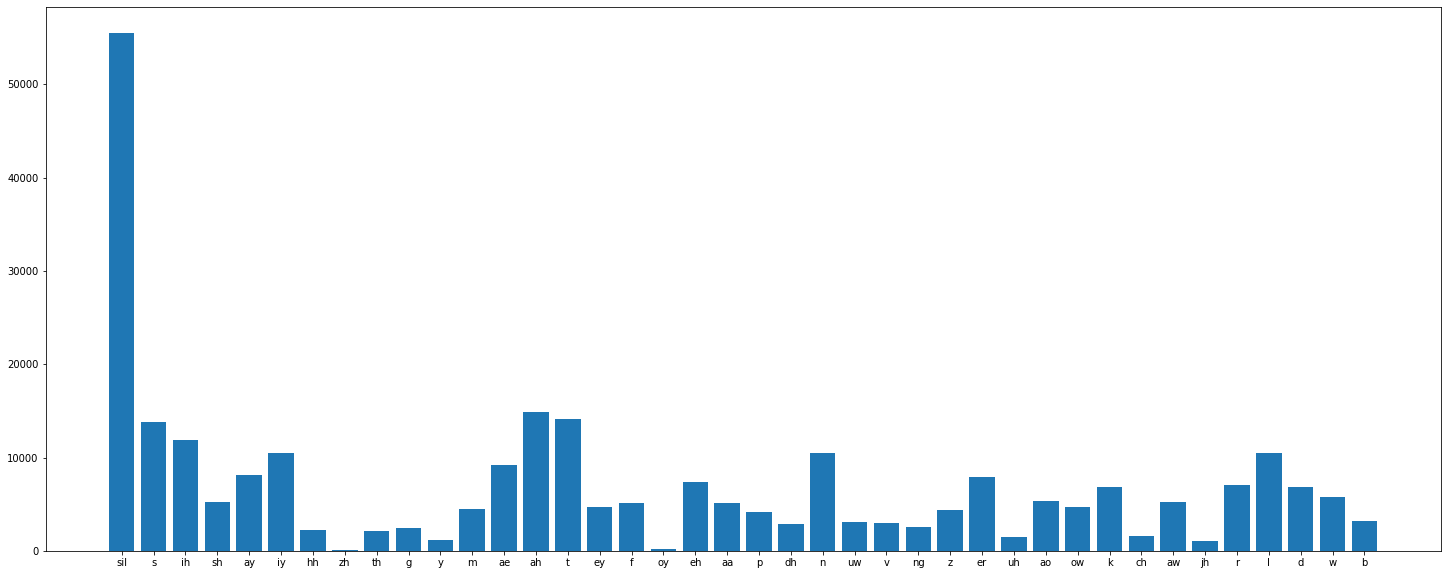

In [25]:
plt.rcParams["figure.figsize"] = (25,10)
plt.bar(phone_df["phone_label"].tolist(), phone_df["phone_count"].tolist())

### Visualise Phonemes

In [29]:
import matplotlib.pyplot as plt
from matplotlib import cm

def plot_mel_spectrogram(mel_spec, title):
    fig, ax = plt.subplots(1)

    ax.set_title(f"Mel Spectogram \"{title}\"")
    pred = np.swapaxes(mel_spec, 0, 1)
    cax = ax.imshow(pred, interpolation='nearest', cmap=cm.coolwarm, origin='lower')

    return fig

130 130
0 ['ae', 'ae', 'ae', 'ae', 'ae', 'd', 'd', 'd', 'd', 'd', 'd', 'sil', 'sil', 'n', 'n', 'n', 'n', 'n', 'aa', 'aa', 'aa', 'aa', 'aa', 'aa', 'aa', 'aa', 'aa', 'aa', 't', 'sil']
30 ['sil', 'sil', 'sil', 'sil', 'sil', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm']
60 ['ow', 'ow', 'ow', 'ow', 'ow', 'ow', 'ow', 'ow', 'ow', 'ow', 'ow', 'm', 'm', 'm', 'm', 'm', 'm', 'ah', 'ah', 'ah', 'ah', 'n', 'n', 'n', 't', 't', 't', 'sil', 'sil', 'sil']
90 ['sil', 'sil', 'sil', 'sil', 'sil', 'sil', 'sil', 'sil', 'th', 'th', 'th', 'th', 'th', 'th', 'th', 'th', 'th', 'th', 'th', 'ih', 'ih', 'ih', 'ih', 'ih', 'ih', 'ih', 'ih', 'ng', 'ng', 'ng']
120 ['k', 'k', 'k', 'sil', 'ah', 'ah', 'ah', 'ah', 'ah', 'ah']


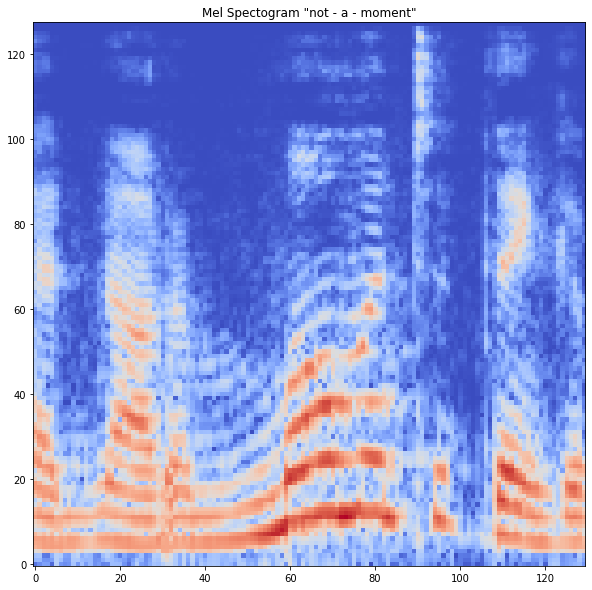

In [51]:
phone_dict = dataset.phoneme_dict
idx = 300
cur_segment = dataset[idx]
cur_segment_label  = dataset[idx-1]["label"] + " - " + cur_segment["label"] + " - " + dataset[idx+1]["label"]
cur_segment_audio  = cur_segment["audio_feats"]
cur_segment_phones = cur_segment["phonemes"]
_ = plot_mel_spectrogram(cur_segment_audio, cur_segment_label)
phone_classes = [phone_dict[ph_id] for ph_id in cur_segment_phones]
print(cur_segment_audio.shape[0], len(phone_classes))
window_size = 30
window_ms = int(window_size / 10)
for i in range(int(math.ceil(len(phone_classes) / window_size))):
    print(i * window_size, phone_classes[i * window_size:(i+1) * window_size])
    # print(phone_classes)

## Single/Multi Segment Phoneme Classification (Overfit)

### Model

In [9]:
import torch.nn as nn
import torch.nn.functional as F

from lib.transformer import *

class ProposedModel(nn.Module):
    def __init__(self,
                 model_size,
                 dropout=0.2,
                 num_layers=6,
                 n_heads=8,
                 dim_feedforward=3072,
                 out_dim=80,
                 use_resnet=False):
        super().__init__()
        self.use_resnet = use_resnet

        if use_resnet:
            self.conv_blocks = nn.Sequential(
                ResBlock(62, model_size, 2),
                ResBlock(model_size, model_size, 2),
                ResBlock(model_size, model_size, 2),
            )
            self.w_raw_in = nn.Linear(model_size, model_size)

        encoder_layer = TransformerEncoderLayer(
            d_model=model_size,
            nhead=n_heads,
            relative_positional=True,
            relative_positional_distance=100,
            dim_feedforward=dim_feedforward,
            dropout=dropout)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers)
        self.w_out = nn.Linear(model_size, out_dim)
    
    def forward(self, x):
        # (Optional) ResNet Blocks
        if self.use_resnet:
            # x shape is (batch, time, electrode)
            x = x.transpose(1, 2)
            x = self.conv_blocks(x)
            x = x.transpose(1, 2)
            x = self.w_raw_in(x)

        # Transformer
        x = x.transpose(0, 1)
        x = self.transformer(x)
        x = x.transpose(0, 1)

        # Final MLP
        x = self.w_out(x)

        return x


class ResBlock(nn.Module):
    def __init__(self, num_ins, num_outs, stride=1):
        super().__init__()

        self.conv1 = nn.Conv1d(num_ins, num_outs, 3, padding=1, stride=stride)
        self.bn1 = nn.BatchNorm1d(num_outs)
        self.conv2 = nn.Conv1d(num_outs, num_outs, 3, padding=1)
        self.bn2 = nn.BatchNorm1d(num_outs)

        if stride != 1 or num_ins != num_outs:
            self.residual_path = nn.Conv1d(num_ins, num_outs, 1, stride=stride)
            self.res_norm = nn.BatchNorm1d(num_outs)
        else:
            self.residual_path = None

    def forward(self, x):
        input_value = x

        x = F.relu(self.bn1(self.conv1(x)))
        x = self.bn2(self.conv2(x))

        if self.residual_path is not None:
            res = self.res_norm(self.residual_path(input_value))
        else:
            res = input_value

        return F.relu(x + res)

In [10]:
target_label = "of"
synth_examples = [dataset[idx] for idx in dataset.get_label_idxs(target_label)]

import torch
import random

from lib.transduction import DigitalVoicingModel

electrode_slice = 60
ins = 5 * electrode_slice # 5 hand-crafted features * 62 electrodes
# outs = 128 # n mels
outs = len(dataset.phoneme_dict)

device = "cuda" if torch.cuda.is_available() else "cpu"

seed = 1
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

model_type = "transformer" # "transformer" # "res-trans"

dropout = 0.0

if model_type == "lstm":
    model = DigitalVoicingModel(
        ins=ins,
        model_size=128,
        n_layers=2,
        dropout=dropout,
        outs=outs).to(device)
elif model_type == "transformer":
    model = ProposedModel(\
        model_size=ins,
        dropout=dropout,  # 0.2,
        num_layers=8,
        n_heads=2,
        dim_feedforward=3072,
        out_dim=outs).to(device)
elif model_type == "res-trans":
    model_size = 768
    model = ProposedModel(\
        model_size=model_size,
        dropout=dropout,
        num_layers=8,
        n_heads=2,
        dim_feedforward=3072,
        out_dim=outs,
        use_resnet=True).to(device)

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.nn.utils.rnn import pad_sequence

from torch.cuda.amp.grad_scaler import GradScaler

import matplotlib.pyplot as plt

print("MODEL TYPE:", model_type)

X_s = []
y_s = []

flatten = lambda lst: [item for sublist in lst for item in sublist]
ratio = 1.0
# synth_examples = flatten(synth_examples)
pivot_point = int(len(synth_examples) * ratio)

# print("synth_examples:", synth_examples)

for synth_example in synth_examples:
    X = torch.tensor(synth_example["eeg_feats"]).to(device)
    y = torch.tensor(synth_example["phonemes"]).to(device)
    clip_len = min(X.shape[0], y.shape[0])
    X = X[:clip_len, :ins]
    y = y[:clip_len]
    X = torch.unsqueeze(X, 0)
    y = torch.unsqueeze(y, 0)
    X_s.append(X)
    y_s.append(y)

print("pivot_point:", pivot_point)
# print("PAD SEQ - X_s.shape, y_s.shape:", X_s.shape, y_s.shape)
train_X_s = X_s[:pivot_point]
train_y_s = y_s[:pivot_point]

train_X_s = pad_sequence(train_X_s, batch_first=True)
train_y_s = pad_sequence(train_y_s, batch_first=True)

train_X_s = torch.squeeze(train_X_s, 1)
train_y_s = torch.squeeze(train_y_s, 1)

lr = 5e-4 # 1e-3 # 5e-4 # 1e-3
optim = torch.optim.AdamW(model.parameters(), lr=lr)

amp = True
epochs = 20_000
scaler = GradScaler()
criteria = nn.CrossEntropyLoss() # nn.MSELoss()

pred_s = []
losses = []

for i in range(epochs):
    optim.zero_grad()

    with torch.autocast(
        enabled=amp,
        dtype=torch.bfloat16,
        device_type=device):

        #print("model inp:", X.shape, X.dtype)

        pred = model(X)
        pred = F.log_softmax(pred, -1)

        #print("model outp (pred):", pred.shape, pred.dtype)
        #print("model target (y):", y.shape, y.dtype)

        """
        if y.shape[1] < pred.shape[1]:
            pred = pred[:, :y.shape[1], :]
            #print("model outp (clipped):", pred.shape, pred.dtype)
            #print("y:", y.shape)
        """
        
        assert pred.shape[0] == y.shape[0]
        loss_iter = pred.shape[0]
        losses = []
        correct_phones = 0
        total_len = 0

        for iter in range(loss_iter):
            cur_pred = pred[iter, :, :]
            cur_y    = y[iter, :]
            pred_phones = cur_pred.argmax(-1)
            y_phones = cur_y
            print("cur_pred.shape, cur_y.shape:", cur_pred.shape, cur_y.shape)
            print("cur_pred.dtype, cur_y.dtype:", cur_pred.dtype, cur_y.dtype)
            loss = criteria(cur_pred, cur_y)
            losses.append(loss)
            correct_phones += (pred_phones == y_phones).sum().item()
            total_len += y_phones.size(0)
        loss = sum(losses) / loss_iter

        if i % 100 == 0:
            pred_s.append(pred.cpu().detach())
            losses.append(loss.item())
            print(i, loss.item(), f"{(correct_phones / total_len)*100:.2f}%")
            print(pred_phones, y_phones)

    scaler.scale(loss).backward()
    scaler.step(optim)
    scaler.update()

MODEL TYPE: transformer
pivot_point: 41
cur_pred.shape, cur_y.shape: torch.Size([130, 40]) torch.Size([130])
cur_pred.dtype, cur_y.dtype: torch.float32 torch.int64
0 3.9466936588287354 3.85%
tensor([30, 23, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 14, 25, 30,
         1,  1,  1,  1,  1,  1,  1, 30, 30, 30, 30, 15, 15, 15, 15, 15, 15,  1,
         1, 25, 25, 25, 25, 25, 25, 25, 23,  1, 25, 15, 15, 28, 28, 28,  1,  1,
        19,  1,  1, 23, 25, 25, 25, 25, 15, 15, 15, 30, 15, 23, 14, 25, 25, 25,
        25, 25, 25, 25, 25, 25, 25, 14, 14, 14, 14, 14, 14, 25, 25, 25, 38, 30,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 25, 25, 25, 25, 25,
        25, 25, 25, 25, 25, 25, 14, 14,  1,  1,  1, 23, 25, 25, 25, 25, 25,  1,
         1,  1,  1,  1], device='cuda:0') tensor([ 0, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 19, 19, 19, 19, 19, 19, 19,
        19, 19, 19, 20, 20, 20, 20, 20, 20, 20,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  6,  6,  6,  6,  6, 27, 27, 27, 27,

KeyboardInterrupt: 

## Phoneme Classification (Generalise)

### Model

In [40]:
import torch.nn as nn
import torch.nn.functional as F

from lib.transformer import *

class ProposedModel(nn.Module):
    def __init__(self,
                 model_size,
                 dropout=0.2,
                 num_layers=6,
                 n_heads=8,
                 dim_feedforward=3072,
                 out_dim=80,
                 use_resnet=False):
        super().__init__()
        self.use_resnet = use_resnet

        if use_resnet:
            self.conv_1 = ResBlock(60, model_size, 2)
            self.conv_2 = ResBlock(model_size, model_size, 2)
            """
            self.conv_blocks = nn.Sequential(
                ResBlock(60, model_size, 2),
                ResBlock(model_size, model_size, 2),
                # (Removed as 400>200>100hz, instead of 800>400>200>100hz)
                # ResBlock(model_size, model_size, 2),
            )
            """
            self.w_raw_in = nn.Linear(model_size, model_size)

        encoder_layer = TransformerEncoderLayer(
            d_model=model_size,
            nhead=n_heads,
            relative_positional=True,
            relative_positional_distance=100,
            dim_feedforward=dim_feedforward,
            dropout=dropout)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers)
        self.w_out = nn.Linear(model_size, out_dim)
    
    def forward(self, x):
        # (Optional) ResNet Blocks
        if self.use_resnet:
            # x shape is (batch, time, electrode)
            #print("use_resnet->x.shape: start", x.shape, x.dtype)
            x = x.transpose(1, 2)
            #print("use_resnet->x.shape: transpose(1, 2)", x.shape, x.dtype)
            # x = self.conv_blocks(x)
            # print("use_resnet->x.shape: conv_blocks", x.shape, x.dtype)

            x = self.conv_1(x)
            #print("use_resnet->x.shape: self.conv_1", x.shape, x.dtype)
            x = self.conv_2(x)
            #print("use_resnet->x.shape: self.conv_2", x.shape, x.dtype)
            
            x = x.transpose(1, 2)
            #print("use_resnet->x.shape: transpose(1, 2)", x.shape, x.dtype)
            x = self.w_raw_in(x)
            #print("use_resnet->x.shape: w_raw_in", x.shape, x.dtype)

        # Transformer
        x = x.transpose(0, 1)
        x = self.transformer(x)
        x = x.transpose(0, 1)

        # Final MLP
        x = self.w_out(x)

        return x


class ResBlock(nn.Module):
    def __init__(self, num_ins, num_outs, stride=1):
        super().__init__()

        self.conv1 = nn.Conv1d(num_ins, num_outs, 3, padding=1, stride=stride)
        self.bn1 = nn.BatchNorm1d(num_outs)
        self.conv2 = nn.Conv1d(num_outs, num_outs, 3, padding=1)
        self.bn2 = nn.BatchNorm1d(num_outs)

        if stride != 1 or num_ins != num_outs:
            self.residual_path = nn.Conv1d(num_ins, num_outs, 1, stride=stride)
            self.res_norm = nn.BatchNorm1d(num_outs)
        else:
            self.residual_path = None

    def forward(self, x):
        input_value = x

        x = F.relu(self.bn1(self.conv1(x)))
        x = self.bn2(self.conv2(x))

        if self.residual_path is not None:
            res = self.res_norm(self.residual_path(input_value))
        else:
            res = input_value

        return F.relu(x + res)

### Select Model

In [41]:
import torch
import random

seed = 1
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

device = "cuda" if torch.cuda.is_available() else "cpu"

ins = dataset.num_features
outs = len(dataset.phoneme_dict) # mel bins

model_type = "transformer" # "res-trans" # "lstm"

dropout = 0.2
if model_type == "lstm":
    model = DigitalVoicingModel(
        ins=ins,
        model_size=128,
        n_layers=2,
        dropout=dropout,
        outs=outs).to(device)
elif model_type == "transformer":
    model = ProposedModel(\
        model_size=ins,
        dropout=dropout,  # 0.2,
        num_layers=4, # 8,
        n_heads=2,
        dim_feedforward=3072,
        out_dim=outs).to(device)
elif model_type == "res-trans":
    model_size = 768
    model = ProposedModel(\
        model_size=model_size,
        dropout=dropout,
        num_layers=8,
        n_heads=2,
        dim_feedforward=3072,
        out_dim=outs,
        use_resnet=True).to(device)

### Create Trainset, Testset

In [42]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.nn.utils.rnn import pad_sequence

from torch.cuda.amp.grad_scaler import GradScaler

X_s = []
y_s = []

batch_size = 32

# Set examples
# target_labels  = ["a"]

# target_idx_s   = [dataset.get_label_idxs(target_label)
#                   for target_label in target_labels]
# print("target_idx_s:", target_idx_s)

# target_idx_s   = [list(range(1, 51))]
target_idx_s   = [list(range(len(dataset)))]
# target_idx_s   = [list(range(0, 101))]
synth_examples = [[dataset[target_idx]
                   for target_idx in target_idxs]
                  for target_idxs in target_idx_s]

flatten = lambda lst: [item for sublist in lst for item in sublist]
ratio = 0.9
synth_examples = flatten(synth_examples) # If using matched idxs, enable this
pivot_point    = int(len(synth_examples) * ratio)

input_feature  = "eeg_feats" # "eeg_raw"
output_feature = "phonemes"
pad_len_x = max([eg[input_feature].shape[0] for eg in synth_examples])
pad_len_y = max([eg[output_feature].shape[0] for eg in synth_examples])
if input_feature == "eeg_raw":
    ins = 60 # input channels, 60 instead of 62 because last 2 are reference electrodes for brennan 2019 (left and right mastoid regions)
else:
    ins = 300

for i, synth_example in enumerate(synth_examples):
    print(i, synth_example["label"])
    X = torch.tensor(synth_example[input_feature])
    y = torch.tensor(synth_example[output_feature], dtype=torch.int64)
    
    clip_len = min(X.shape[0], y.shape[0])
    X = X[:, :ins]
    
    if not input_feature == "eeg_raw":
        X = X[:clip_len, :ins] # Same len
        y = y[:clip_len]    # Same len
        X_padding = torch.zeros(pad_len_y - X.shape[0], X.shape[1])
        X = torch.cat((X, X_padding), dim=0)

    y_padding = torch.zeros(pad_len_y - y.shape[0], dtype=torch.int64)
    y = torch.cat((y, y_padding), dim=0)

    X = torch.unsqueeze(X, 0).to(device)
    y = torch.unsqueeze(y, 0).to(device)
    
    print("y.dtype:", y.dtype)

    X_s.append(X)
    y_s.append(y)

print("pivot_point:", pivot_point)

train_X_s = X_s[:pivot_point]
train_y_s = y_s[:pivot_point]
train_X_s = pad_sequence(train_X_s, batch_first=True)
train_y_s = pad_sequence(train_y_s, batch_first=True)

train_X_s = torch.squeeze(train_X_s, 1)
train_y_s = torch.squeeze(train_y_s, 1)
train_X_s = torch.split(train_X_s, batch_size, dim=0)
train_y_s = torch.split(train_y_s, batch_size, dim=0)

test_X_s = X_s[pivot_point:]
test_y_s = y_s[pivot_point:]
test_X_s = pad_sequence(test_X_s, batch_first=True)
test_y_s = pad_sequence(test_y_s, batch_first=True)

test_X_s = torch.squeeze(test_X_s, 1)
test_y_s = torch.squeeze(test_y_s, 1)
test_X_s = torch.split(test_X_s, batch_size, dim=0)
test_y_s = torch.split(test_y_s, batch_size, dim=0)

print(
    train_X_s[0].shape,
    train_y_s[0].shape,
    test_X_s[0].shape,
    test_y_s[0].shape)

0 Alice
y.dtype: torch.int64
1 was
y.dtype: torch.int64
2 beginning
y.dtype: torch.int64
3 to
y.dtype: torch.int64
4 get
y.dtype: torch.int64
5 very
y.dtype: torch.int64
6 tired
y.dtype: torch.int64
7 of
y.dtype: torch.int64
8 sitting
y.dtype: torch.int64
9 by
y.dtype: torch.int64
10 her
y.dtype: torch.int64
11 sister
y.dtype: torch.int64
12 on
y.dtype: torch.int64
13 the
y.dtype: torch.int64
14 bank
y.dtype: torch.int64
15 and
y.dtype: torch.int64
16 of
y.dtype: torch.int64
17 having
y.dtype: torch.int64
18 nothing
y.dtype: torch.int64
19 to
y.dtype: torch.int64
20 do
y.dtype: torch.int64
21 once
y.dtype: torch.int64
22 or
y.dtype: torch.int64
23 twice
y.dtype: torch.int64
24 she
y.dtype: torch.int64
25 peeped
y.dtype: torch.int64
26 into
y.dtype: torch.int64
27 the
y.dtype: torch.int64
28 book
y.dtype: torch.int64
29 her
y.dtype: torch.int64
30 sister
y.dtype: torch.int64
31 was
y.dtype: torch.int64
32 reading
y.dtype: torch.int64
33 but
y.dtype: torch.int64
34 it
y.dtype: torch.int6

### Train Model

In [43]:
patience = 5
lr = 5e-5 # 5e-5 # 1e-4 # 3e-4 # 1e-3 # 5e-4 # 1e-3 # (3e-4)
optim = torch.optim.Adam(model.parameters(), lr=lr)
lr_sched = \
    torch.optim.lr_scheduler.ReduceLROnPlateau(\
        optim, 'min', 0.5, patience=patience)

amp = True
epochs = 20_000
scaler = GradScaler()
criteria = nn.CrossEntropyLoss()

pred_s  = []
losses  = []
vlosses = []

def test(model):
    model.eval()

    losses = []
    correct_phones = 0
    total_len = 0

    for batch_x, batch_y in zip(test_X_s, test_y_s):
        with torch.no_grad():
            with torch.autocast(
            enabled=amp,
            dtype=torch.bfloat16,
            device_type=device):
                pred = model(batch_x.bfloat16())
                pred = F.log_softmax(pred, -1)

                loss_iter = pred.shape[0]
                losses = []
                

                for iter in range(loss_iter):
                    cur_pred = pred[iter, :, :]
                    cur_y    = batch_y[iter, :]
                    pred_phones = cur_pred.argmax(-1)
                    y_phones = cur_y
                    #print("cur_pred.shape, cur_y.shape:", cur_pred.shape, cur_y.shape)
                    #print("cur_pred.dtype, cur_y.dtype:", cur_pred.dtype, cur_y.dtype)
                    loss = criteria(cur_pred, cur_y)
                    losses.append(loss)
                    correct_phones += (pred_phones == y_phones).sum().item()
                    total_len += y_phones.size(0)
                loss = sum(losses) / loss_iter

                losses.append(loss.detach().cpu())

    loss = sum(losses) / len(losses)
    acc = correct_phones / total_len

    return loss, acc

def train(model):
    model.train()

    losses = []
    correct_phones = 0
    total_len = 0

    optim.zero_grad()

    batch_idx = 0
    for batch_x, batch_y in zip(train_X_s, train_y_s):
        with torch.autocast(
            enabled=amp,
            dtype=torch.bfloat16,
            device_type=device):

            pred = model(batch_x.bfloat16())
            pred = F.log_softmax(pred, -1)
            
            # assert pred.shape[0] == y.shape[0], f"ello {pred.shape[0]} {pred.shape[0]}"
            loss_iter = pred.shape[0]
            losses = []

            for iter in range(loss_iter):
                cur_pred = pred[iter, :, :]
                cur_y    = batch_y[iter, :]
                pred_phones = cur_pred.argmax(-1)
                y_phones = cur_y
                #print("cur_pred.shape, cur_y.shape:", cur_pred.shape, cur_y.shape)
                #print("cur_pred.dtype, cur_y.dtype:", cur_pred.dtype, cur_y.dtype)
                loss = criteria(cur_pred, cur_y)
                losses.append(loss)
                correct_phones += (pred_phones == y_phones).sum().item()
                total_len += y_phones.size(0)
            loss = sum(losses) / loss_iter

            """
            if pred.shape[1] != batch_y.shape[1]:
                pred = pred[:, :batch_y.shape[1], :]
            """
            losses.append(loss.detach().cpu())

            scaler.scale(loss).backward()
            scaler.step(optim)
            scaler.update()
        batch_idx += 1
    # scheduler.step()

    acc = correct_phones / total_len

    return loss, acc

def go(model):
    for i in range(epochs):
        loss, acc = train(model)
        vloss, v_acc = test(model)
        # lr_sched.step(vloss)
        if i % 1 == 0:
            losses.append(loss.item())
            vlosses.append(vloss.item())
            print(i, loss.item(), f"{acc*100:.4f}%", vloss.item(), f"{v_acc*100:.4f}%")

go(model)

# x shape is (batch, time, electrode)

0 3.2851736545562744 19.0340% 3.3029532432556152 20.3034%
1 3.2831239700317383 20.1261% 3.31947922706604 20.3034%
2 3.2810778617858887 20.1265% 3.3290698528289795 20.3034%
3 3.2758781909942627 20.1265% 3.33426570892334 20.3034%
4 3.273536443710327 20.1261% 3.3376986980438232 20.3034%
5 3.2752604484558105 20.1253% 3.3425986766815186 20.3034%
6 3.275005578994751 20.1253% 3.345712900161743 20.3034%
7 3.271796703338623 20.1249% 3.351679563522339 20.3034%
8 3.2762093544006348 20.1220% 3.3535962104797363 20.3034%
9 3.268639326095581 20.1229% 3.3610293865203857 20.3034%
10 3.2620532512664795 20.1233% 3.3701679706573486 20.3034%
11 3.2555654048919678 20.1361% 3.375666379928589 20.3034%
12 3.253992795944214 20.1313% 3.387603759765625 20.2997%
13 3.2475340366363525 20.1634% 3.4029109477996826 20.2636%
14 3.2444443702697754 20.1522% 3.4142940044403076 20.2709%
15 3.2390246391296387 20.1674% 3.4304747581481934 20.2384%
16 3.237271547317505 20.2112% 3.4472570419311523 20.2275%
17 3.2278146743774414

KeyboardInterrupt: 